In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("Typhoid_Fever_Data.csv")
df.head()


Patient ID  Age  Gender Symptoms Severity  Hemoglobin (g/dL)  \
0           1   38  Female               Low          24.012919   
1           2   48    Male          Moderate          12.300000   
2           3   33    Male              High          10.700000   
3           4   56    Male              High          14.900000   
4           5   67    Male               NaN          13.100000   

   Platelet Count Blood Culture Bacteria Urine Culture Bacteria  \
0          259366       Escherichia coli  Klebsiella pneumoniae   
1          208128       Salmonella typhi                      -   
2          251028       Escherichia coli                      -   
3          157787       Salmonella typhi  Klebsiella pneumoniae   
4          217075       Salmonella typhi       Escherichia coli   

   Calcium (mg/dL)  Potassium (mmol/L) Current Medication Treatment Duration  \
0              8.7            9.079248        Amoxicillin            15 days   
1              8.3            4.300000        Ceftriaxone             5 days   
2             10.0            3.800000       Azithromycin            15 days   
3              9.4            3.700000        Ceftriaxone            13 days   
4              9.8            5.000000        Amoxicillin            13 days   

  Treatment Outcome  
0      Unsuccessful  
1        Successful  
2      Unsuccessful  
3        Successful  
4               NaN

In [5]:
df.describe()

Patient ID          Age  Hemoglobin (g/dL)  Platelet Count  \
count  5760.000000  5760.000000        5760.000000     5760.000000   
mean   2880.500000    43.092361          12.993261   209146.474653   
std    1662.913107    14.910935           2.640090    50014.224866   
min       1.000000    18.000000          10.000000   120255.000000   
25%    1440.750000    31.000000          11.300000   168405.000000   
50%    2880.500000    42.000000          12.600000   211847.000000   
75%    4320.250000    55.000000          13.900000   251028.000000   
max    5760.000000    70.000000          24.986969   299799.000000   

       Calcium (mg/dL)  Potassium (mmol/L)  
count      5760.000000         5760.000000  
mean          9.054488            4.567818  
std           2.439132            1.382174  
min           0.021594            3.500000  
25%           8.500000            3.900000  
50%           9.000000            4.300000  
75%           9.500000            4.700000  
max          78.168298           14.520085

In [6]:
df.select_dtypes(include=np.number).head(10)

Patient ID  Age  Hemoglobin (g/dL)  Platelet Count  Calcium (mg/dL)  \
0           1   38          24.012919          259366              8.7   
1           2   48          12.300000          208128              8.3   
2           3   33          10.700000          251028             10.0   
3           4   56          14.900000          157787              9.4   
4           5   67          13.100000          217075              9.8   
5           6   19          12.800000          264479              8.7   
6           7   55          14.900000          178364              9.1   
7           8   70          14.800000          200389              8.7   
8           9   28          14.700000          250223              9.6   
9          10   24          13.200000          162206              9.3   

   Potassium (mmol/L)  
0            9.079248  
1            4.300000  
2            3.800000  
3            3.700000  
4            5.000000  
5            4.900000  
6            4.700000  
7            4.200000  
8            4.100000  
9            4.200000

In [7]:
print("Jumlah record:", df.shape[0])
print("Jumlah attribute:", df.shape[1])
print("Nama attribute:", df.columns.tolist())
print("Jumlah attribute angka:", len(df.select_dtypes(include=np.number).columns))

Jumlah record: 5760
Jumlah attribute: 13
Nama attribute: ['Patient ID', 'Age', 'Gender', 'Symptoms Severity', 'Hemoglobin (g/dL)', 'Platelet Count', 'Blood Culture Bacteria', 'Urine Culture Bacteria', 'Calcium (mg/dL)', 'Potassium (mmol/L)', 'Current Medication', 'Treatment Duration', 'Treatment Outcome']
Jumlah attribute angka: 6


In [8]:
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].nunique()} label")

Gender: 2 label
Symptoms Severity: 3 label
Blood Culture Bacteria: 3 label
Urine Culture Bacteria: 3 label
Current Medication: 3 label
Treatment Duration: 11 label
Treatment Outcome: 2 label


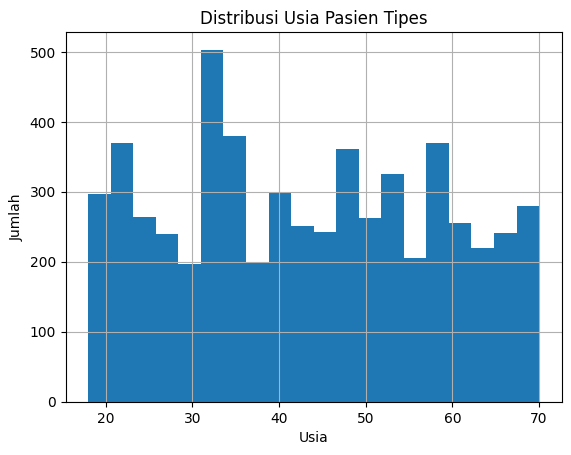

In [9]:
df['Age'].hist(bins=20)
plt.title("Distribusi Usia Pasien Tipes")
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.show()

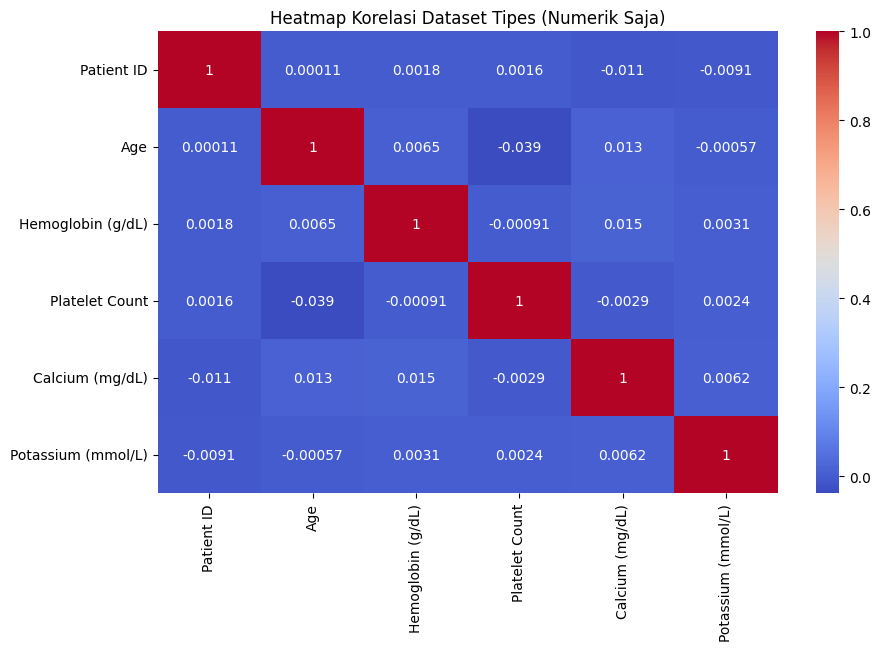

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Dataset Tipes (Numerik Saja)")
plt.show()


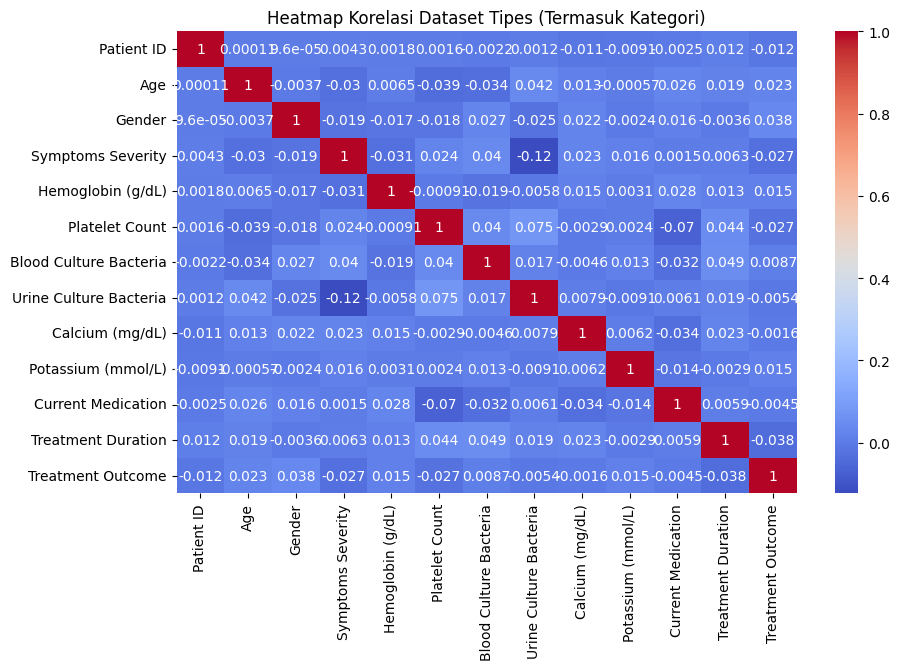

In [15]:
df_encoded = df.copy()
for col in df.select_dtypes(include="object").columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Dataset Tipes (Termasuk Kategori)")
plt.show()


KESIMPULAN
- Dataset berisi informasi pasien dengan berbagai variabel seperti umur, gender, tingkat keparahan gejala, hasil uji laboratorium (hemoglobin, platelet, kalsium, kalium), serta jenis bakteri yang ditemukan.
- Sebagian besar pasien yang terkena tifus adalah dewasa (usia 30–60 tahun).
- Nilai hemoglobin dan platelet bervariasi, namun pasien dengan tingkat gejala “High” cenderung memiliki nilai hemoglobin lebih rendah dan platelet lebih sedikit.
-Infeksi bakteri yang paling dominan adalah Salmonella typhi pada uji darah, sedangkan pada uji urin ditemukan Klebsiella pneumoniae dan Escherichia coli.
- Lama perawatan berkisar antara 5–15 hari dengan pengobatan menggunakan antibiotik seperti Amoxicillin, Ceftriaxone, dan Azithromycin.
-Hasil pengobatan ada yang berhasil (Successful) dan ada juga yang gagal (Unsuccessful), hal ini bisa dipengaruhi oleh jenis bakteri, tingkat keparahan gejala, serta kondisi laboratorium pasien.
- Secara umum, semakin berat gejalanya → semakin lama durasi pengobatan dan kemungkinan gagal sembuh lebih tinggi.